# Modeling: Decision Tree

### Import packages and modules

In [20]:
import csv
import numpy as np
import pandas as pd
import math

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# For producing decision tree diagrams.
from IPython.display import Image
import pydotplus
import pygraphviz # conda install python-graphviz (from anaconda in administrator mode)

### Import data

In [8]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [9]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


### Baseline Model

Let's first create a baseline naive bayes model.

In [10]:
# Baseline Model 
dt_baseline = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=4)

dt_baseline.fit(X_train, Y_train)

Y_pred_dt_baseline = dt_baseline.predict(X_test)

Text(33.0, 0.5, 'Truth')

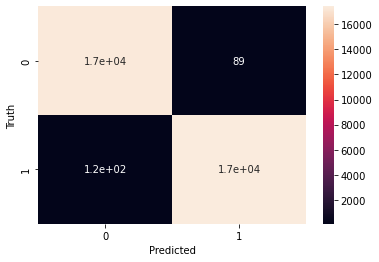

In [11]:
cm_baseline = confusion_matrix(Y_test, Y_pred_dt_baseline)

sns.heatmap(cm_baseline, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
print(classification_report(Y_test, Y_pred_dt_baseline))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17410
         1.0       0.99      0.99      0.99     17552

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962



### Improve the Model

Now let us run the grid search and cross validation to improve our decision tree model.

Specifically we will try to tune our regularization parameter *max_depth* and *min_samples_split* parameter.

MAKE IT ABLE TO GENERALIZE BETTER

In [13]:
# Find the best parameters
param_grid = {'max_depth': [8, 12],
              'min_samples_split': [8, 12]}

dt_gscv = GridSearchCV(DecisionTreeClassifier(random_state = 1, criterion = 'entropy'),
                       param_grid=param_grid, 
                       cv = 5,
                       refit = True,
                       verbose = 3)

dt_gscv.fit(X_train, Y_train)

print(dt_gscv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..max_depth=8, min_samples_split=8;, score=1.000 total time=   0.1s
[CV 2/5] END ..max_depth=8, min_samples_split=8;, score=1.000 total time=   0.2s
[CV 3/5] END ..max_depth=8, min_samples_split=8;, score=1.000 total time=   0.1s
[CV 4/5] END ..max_depth=8, min_samples_split=8;, score=1.000 total time=   0.1s
[CV 5/5] END ..max_depth=8, min_samples_split=8;, score=1.000 total time=   0.1s
[CV 1/5] END .max_depth=8, min_samples_split=12;, score=1.000 total time=   0.1s
[CV 2/5] END .max_depth=8, min_samples_split=12;, score=1.000 total time=   0.1s
[CV 3/5] END .max_depth=8, min_samples_split=12;, score=1.000 total time=   0.1s
[CV 4/5] END .max_depth=8, min_samples_split=12;, score=1.000 total time=   0.2s
[CV 5/5] END .max_depth=8, min_samples_split=12;, score=1.000 total time=   0.2s
[CV 1/5] END .max_depth=12, min_samples_split=8;, score=1.000 total time=   0.1s
[CV 2/5] END .max_depth=12, min_samples_split=8;,

In [14]:
# Improved Model 
dt_2 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = 8, min_samples_split = 12)

dt_2.fit(X_train, Y_train)

Y_pred_dt_2 = dt_2.predict(X_test)

Text(33.0, 0.5, 'Truth')

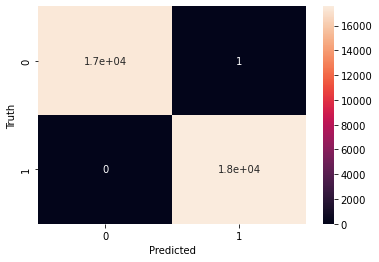

In [15]:
cm_2 = confusion_matrix(Y_test, Y_pred_dt_2)

sns.heatmap(cm_2, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print(classification_report(Y_test, Y_pred_dt_2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17410
         1.0       1.00      1.00      1.00     17552

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



It still seems like there is overfitting happening. Perhaps trying to change other hyperparameters can help. 

In [29]:
# Improved Model 
dt_3 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = 3, min_samples_split=50)

dt_3.fit(X_train, Y_train)

Y_pred_dt_3 = dt_3.predict(X_test)

Text(33.0, 0.5, 'Truth')

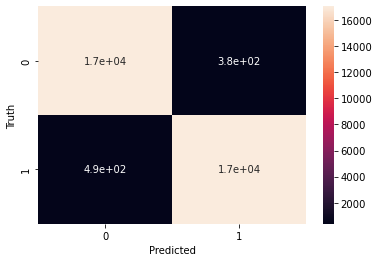

In [30]:
cm_3 = confusion_matrix(Y_test, Y_pred_dt_3)

sns.heatmap(cm_3, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
print(classification_report(Y_test, Y_pred_dt_3))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     17410
         1.0       0.98      0.97      0.98     17552

    accuracy                           0.98     34962
   macro avg       0.98      0.98      0.98     34962
weighted avg       0.98      0.98      0.98     34962



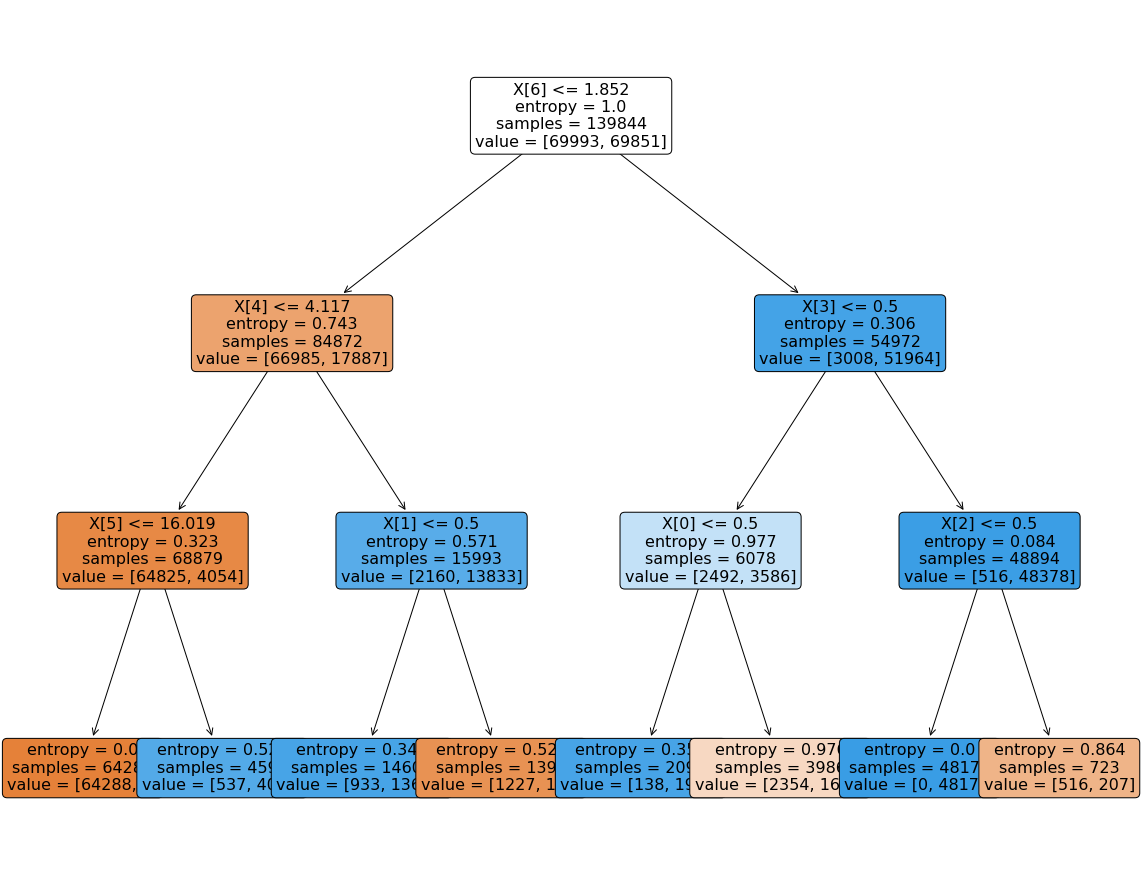

In [32]:
plt.figure(figsize = (20,16))
tree.plot_tree(dt_3, fontsize = 16,rounded = True , filled = True);